In [57]:
import torch
from torchvision import transforms
from PIL import Image
import torch.nn.functional as F

In [58]:
from networks import ConvNet

In [60]:
# 이미지 불러오기 및 전처리
def load_and_preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    preprocess = transforms.Compose([
        transforms.ToTensor()
    ])
    input_tensor = preprocess(image)
    input_batch = input_tensor.unsqueeze(0)  # 모델에 입력하기 위해 배치 차원 추가
    return input_batch

# 모델 정의 및 초기화
model = ConvNet(channel=3, num_classes=10, net_width=128, net_depth=3, net_act='relu', net_norm='instancenorm', net_pooling='avgpooling')

# 저장된 state_dict 불러오기
state_dict = torch.load('DM_model.pt')

# 모델에 state_dict 적용
model.load_state_dict(state_dict)

# 모델을 evaluation mode로 설정
model.eval()

# # 이미지 로드 및 전처리
# image_path = 'split_3.png'
# input_image = load_and_preprocess_image(image_path)

# # 모델에 이미지 전달
# with torch.no_grad():
#     output = model(input_image)

# # 예측 결과 확인
# probabilities = F.softmax(output[0], dim=0)
# predicted_class = torch.argmax(probabilities).item()

# print(f"Predicted class: {predicted_class}")
# print(f"Probability: {probabilities[predicted_class].item()}")

ConvNet(
  (features): Sequential(
    (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): GroupNorm(128, 128, eps=1e-05, affine=True)
    (2): ReLU(inplace=True)
    (3): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): GroupNorm(128, 128, eps=1e-05, affine=True)
    (6): ReLU(inplace=True)
    (7): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (8): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): GroupNorm(128, 128, eps=1e-05, affine=True)
    (10): ReLU(inplace=True)
    (11): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (classifier): Linear(in_features=2048, out_features=10, bias=True)
)

Confusion Matrix:
[[9 0 0 0 0 0 0 0 1 0]
 [1 8 0 0 0 1 0 0 0 0]
 [1 0 7 1 1 0 0 0 0 0]
 [0 0 0 9 0 1 0 0 0 0]
 [0 0 3 0 6 0 0 0 1 0]
 [0 0 0 4 0 6 0 0 0 0]
 [0 0 0 4 0 0 6 0 0 0]
 [0 0 2 0 0 1 0 7 0 0]
 [1 0 0 1 0 0 0 0 8 0]
 [3 0 0 2 0 0 0 0 0 5]]


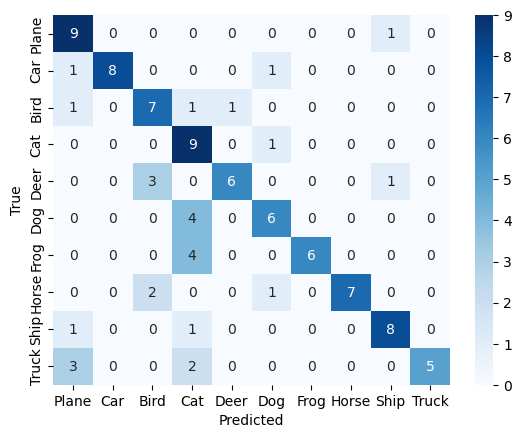

In [61]:
import os
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 이미지 폴더 경로
image_folder = 'split_image'

# 클래스 정의
def get_class(label):
    if 1 <= label <= 10:
        return 0
    elif 11 <= label <= 20:
        return 1
    elif 21 <= label <= 30:
        return 2
    elif 31 <= label <= 40:
        return 3
    elif 41 <= label <= 50:
        return 4
    elif 51 <= label <= 60:
        return 5
    elif 61 <= label <= 70:
        return 6
    elif 71 <= label <= 80:
        return 7
    elif 81 <= label <= 90: #10
        return 8
    elif 91 <= label <= 100: #20
        return 9
    else:
        return -1  # 예외 처리 필요

# Confusion Matrix 초기화
num_classes = 10
conf_matrix = np.zeros((num_classes, num_classes), dtype=int)

# 이미지 폴더 내 파일들에 대해 예측 수행 및 Confusion Matrix 업데이트
for filename in os.listdir(image_folder):
    if filename.endswith('.png'):
        image_path = os.path.join(image_folder, filename)
        input_image = load_and_preprocess_image(image_path)

        with torch.no_grad():
            output = model(input_image)

        probabilities = F.softmax(output[0], dim=0)
        predicted_class = torch.argmax(probabilities).item()
        true_class = get_class(int(filename.split('_')[1].split('.')[0]))

        # Confusion Matrix 업데이트
        if true_class != -1:
            conf_matrix[true_class, predicted_class] += 1

# Confusion Matrix 출력
print("Confusion Matrix:")
print(conf_matrix)

# 시각화
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'], yticklabels=['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

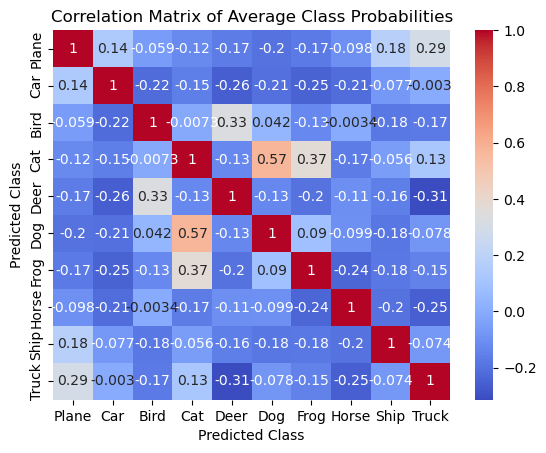

: 

In [63]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 이미지 폴더 경로
image_folder = 'split_image'

# 클래스 별로 예측 확률값 저장
class_probabilities = {i: [] for i in range(num_classes)}

# 이미지 폴더 내 파일들에 대해 예측 수행 및 결과 기록
for filename in os.listdir(image_folder):
    if filename.endswith('.png'):
        image_path = os.path.join(image_folder, filename)
        input_image = load_and_preprocess_image(image_path)

        with torch.no_grad():
            output = model(input_image)

        probabilities = F.softmax(output[0], dim=0).cpu().numpy()
        true_class = get_class(int(filename.split('_')[1].split('.')[0]))

        # 클래스별로 확률값 저장
        if true_class != -1:
            class_probabilities[true_class].append(probabilities)

# 클래스 별로 평균 확률값 계산
average_class_probabilities = {i: np.mean(np.array(probabilities), axis=0) for i, probabilities in class_probabilities.items()}

# 클래스 간 상관관계 계산
correlation_matrix = np.corrcoef([average_class_probabilities[i] for i in range(num_classes)])

# 시각화
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'], yticklabels=['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'])
plt.xlabel('Predicted Class')
plt.ylabel('Predicted Class')
plt.title('Correlation Matrix of Average Class Probabilities')
plt.show()